In [8]:
import sklearn.datasets as skd

news_train = skd.load_files('/Users/harshit_mac/Downloads/20news-bydate (1)/20news-bydate-train',encoding= 'ISO-8859-1')
news_test = skd.load_files('/Users/harshit_mac/Downloads/20news-bydate (1)/20news-bydate-test',encoding= 'ISO-8859-1')

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [10]:
text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

In [11]:
# train the model
text_clf.fit(news_train.data, news_train.target)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [12]:
# Predict the test cases
predicted = text_clf.predict(news_test.data)


In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

In [26]:
# Finding frequency of each category
targets, frequency1 = np.unique(news_train.target, return_counts=True)
targets, frequency1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [27]:
targets_str = np.array(news_train.target_names)
print(list(zip(targets_str, frequency1)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


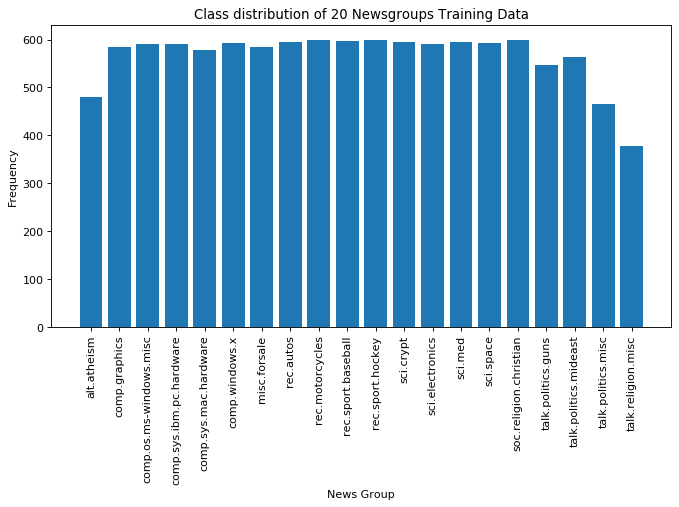

In [48]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency1)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Finding frequency of each category in test
targets, frequency2 = np.unique(news_test.target, return_counts=True)
targets, frequency2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393,
        396, 394, 398, 364, 376, 310, 251]))

In [30]:
targets_str = np.array(news_train.target_names)
print(list(zip(targets_str, frequency2)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


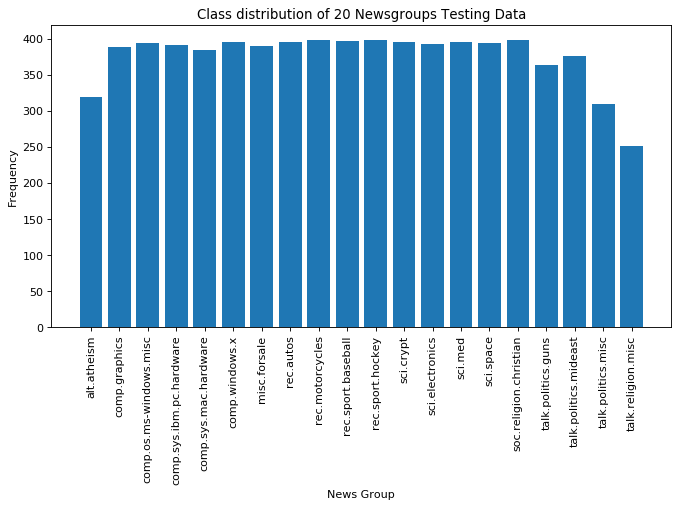

In [47]:
# Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency2)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Testing Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [70]:
print('Accuracy achieved is ' + str(np.mean(predicted == news_test.target)))
print(metrics.classification_report(news_test.target, predicted, target_names=news_test.target_names)),
metrics.confusion_matrix(news_test.target, predicted)

Accuracy achieved is 0.7738980350504514
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92

array([[166,   0,   0,   1,   0,   1,   0,   0,   1,   1,   1,   3,   0,
          6,   3, 123,   4,   8,   0,   1],
       [  1, 252,  15,  12,   9,  18,   1,   2,   1,   5,   2,  41,   4,
          0,   6,  15,   4,   1,   0,   0],
       [  0,  14, 258,  45,   3,   9,   0,   2,   1,   3,   2,  25,   1,
          0,   6,  23,   2,   0,   0,   0],
       [  0,   5,  11, 305,  17,   1,   3,   6,   1,   0,   2,  19,  13,
          0,   5,   3,   1,   0,   0,   0],
       [  0,   3,   8,  23, 298,   0,   3,   8,   1,   3,   1,  16,   8,
          0,   2,   8,   3,   0,   0,   0],
       [  1,  21,  17,  13,   2, 298,   1,   0,   1,   1,   0,  23,   0,
          1,   4,  10,   2,   0,   0,   0],
       [  0,   1,   3,  31,  12,   1, 271,  19,   4,   4,   6,   5,  12,
          6,   3,   9,   3,   0,   0,   0],
       [  0,   1,   0,   3,   0,   0,   4, 364,   3,   2,   2,   4,   1,
          1,   3,   3,   4,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   2,  10, 371,   0,   0,  

Text(159.0, 0.5, 'Value prediction by Model')

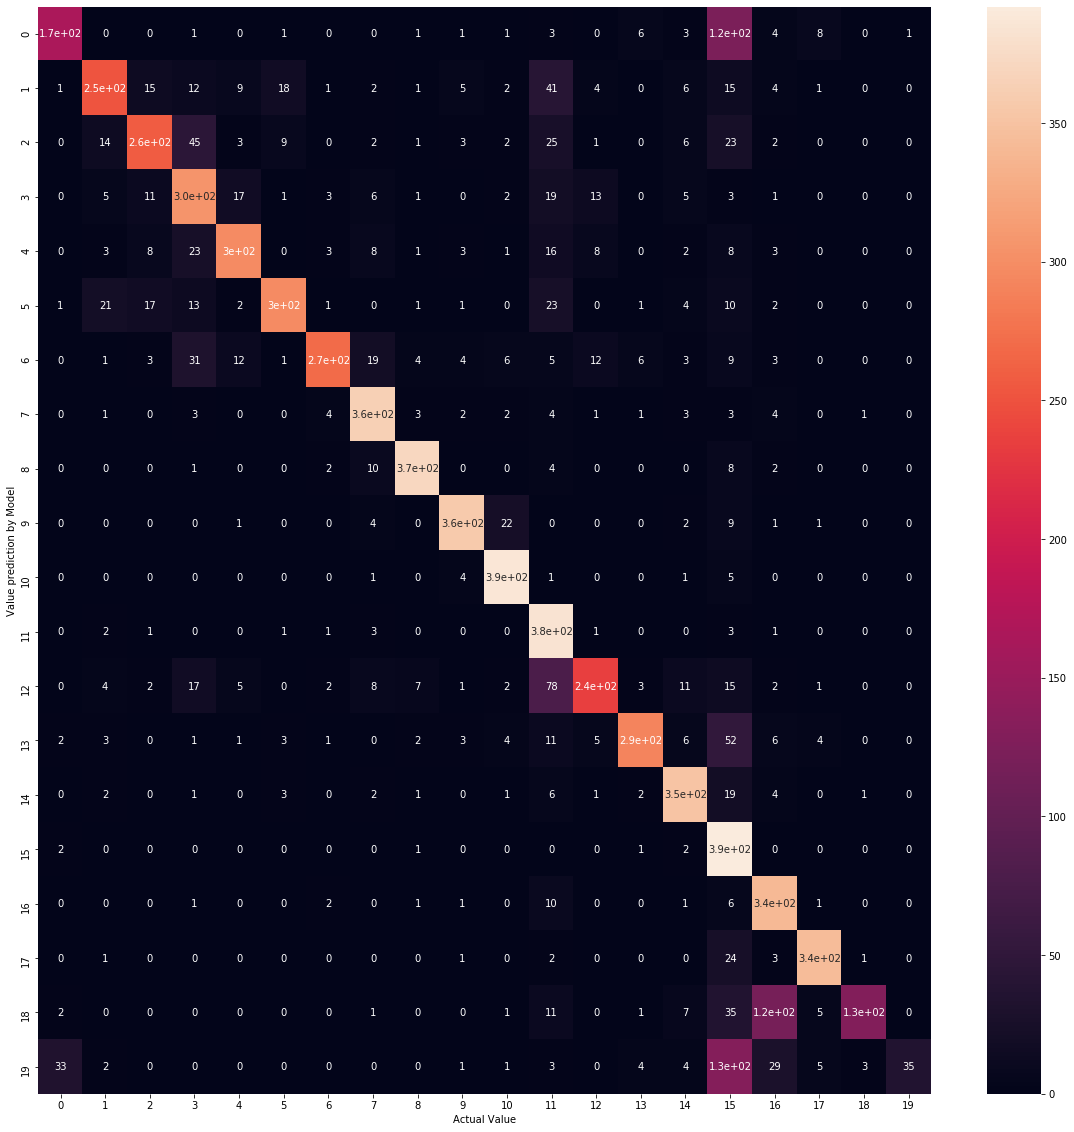

In [69]:
import matplotlib.pyplot as plt2
import seaborn as sn
plt2.figure(figsize=(20,20))
sn.heatmap(metrics.confusion_matrix(news_test.target, predicted),annot=True)
plt2.xlabel('Actual Value')
plt2.ylabel('Value prediction by Model')